In [15]:
from cytograph import Algorithm, creates, requires, div0
from cytograph.visualization.scatter import scatterc, scattern
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from typing import List
import shoji
import cytograph as cg
import cytograph.visualization as cgplot
import collections
from typing import List, Optional
import matplotlib.patheffects as PathEffects
import fastcluster
import igraph
import leidenalg as la
import scipy.cluster.hierarchy as hc
from hmmlearn import hmm
from openTSNE import TSNE
from pynndescent import NNDescent
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from tqdm import trange
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
from cytograph.visualization import Colorizer
from matplotlib.lines import Line2D
import scipy as sci
import seaborn as sns
from scipy.stats import ks_2samp, mannwhitneyu, ttest_ind, ranksums

In [2]:
db = shoji.connect()

In [3]:
ws = db.builds.jesper.GBM_all.SL040

In [6]:
ws1 = db.builds.jesper.GBM_all.SL057_filtered

In [8]:
#number of Genes and UMI distribution across all cell types and regions
NGenes = []
NUMIs = []
Samples = ['Central','Periphery']
celltype = ['Astrocytes','Endothelial','Oligodendrocytes','Pericytes','TAM','Tumor']
unique_samples = []
unique_cells = []
for cell in celltype:
    for sample in Samples:
        NGenes.append(ws1.NGenes[ws1.Zone[:] == sample][ws1.ManualAnnotationSL057_TAM[ws1.Zone[:] == sample] == cell])
        NUMIs.append(ws1.TotalUMIs[ws1.Zone[:] == sample][ws1.ManualAnnotationSL057_TAM[ws1.Zone[:] == sample] == cell])
        NGenes.append(ws.NGenes[ws.ManualAnnotationSL040_central_peri[:] == sample][ws.ManualAnnotationSL040_TAM[ws.ManualAnnotationSL040_central_peri[:] == sample] == cell])
        NUMIs.append(ws.TotalUMIs[ws.ManualAnnotationSL040_central_peri[:] == sample][ws.ManualAnnotationSL040_TAM[ws.ManualAnnotationSL040_central_peri[:] == sample] == cell])

In [166]:
#number of Genes and UMI distribution across all cell types and regions
NGenes = []
NUMIs = []
Samples = ['Central','Periphery']
celltype = ['Astrocytes','Endothelial','Oligodendrocytes','Pericytes','TAM','Tumor']
unique_samples = []
unique_cells = []
for cell in celltype:
    for sample in Samples:
        NGenes.append(ws1.NGenes[ws1.Location[:] == sample][ws1.ManualAnnotationSL057_TAM[ws1.Location[:] == sample] == cell])
        NUMIs.append(ws1.TotalUMIs[ws1.Location[:] == sample][ws1.ManualAnnotationSL057_TAM[ws1.Location[:] == sample] == cell])
        NGenes.append(ws.NGenes[ws.ManualAnnotationSL040_central_peri[:] == sample][ws.ManualAnnotationSL040_TAM[ws.ManualAnnotationSL040_central_peri[:] == sample] == cell])
        NUMIs.append(ws.TotalUMIs[ws.ManualAnnotationSL040_central_peri[:] == sample][ws.ManualAnnotationSL040_TAM[ws.ManualAnnotationSL040_central_peri[:] == sample] == cell])

In [9]:
Samples = ['Central','Periphery']
celltype = ['Astrocytes','Endothelial','Oligodendrocytes','Pericytes','TAM','Tumor']
for cell in celltype:
    for sample in Samples:
                unique_cells.append([str(cell) + "- " + str(sample)])

In [12]:
CentralA = NUMIs[0],NUMIs[1]
CentralUMIA = np.concatenate(CentralA)
PeriA = NUMIs[2], NUMIs[3]
PeriUMIA = np.concatenate(PeriA)
CentralE = NUMIs[4],NUMIs[5]
CentralUMIE = np.concatenate(CentralE)
PeriE = NUMIs[6], NUMIs[7]
PeriUMIE = np.concatenate(PeriE)
CentralO = NUMIs[8],NUMIs[9]
CentralUMIO = np.concatenate(CentralO)
PeriO = NUMIs[10], NUMIs[11]
PeriUMIO = np.concatenate(PeriO)
CentralP = NUMIs[12],NUMIs[13]
CentralUMIP = np.concatenate(CentralP)
PeriP = NUMIs[14], NUMIs[15]
PeriUMIP = np.concatenate(PeriP)
CentralTAM = NUMIs[16],NUMIs[17]
CentralUMITAM = np.concatenate(CentralTAM)
PeriTAM = NUMIs[18], NUMIs[19]
PeriUMITAM = np.concatenate(PeriTAM)
CentralT = NUMIs[20],NUMIs[21]
CentralUMIT = np.concatenate(CentralT)
PeriT = NUMIs[22], NUMIs[23]
PeriUMIT = np.concatenate(PeriT)

In [13]:
MergedUMI = CentralUMIA, PeriUMIA, CentralUMIE, PeriUMIE, CentralUMIO, PeriUMIO, CentralUMIP, PeriUMIP, CentralUMITAM, PeriUMITAM, CentralUMIT, PeriUMIT

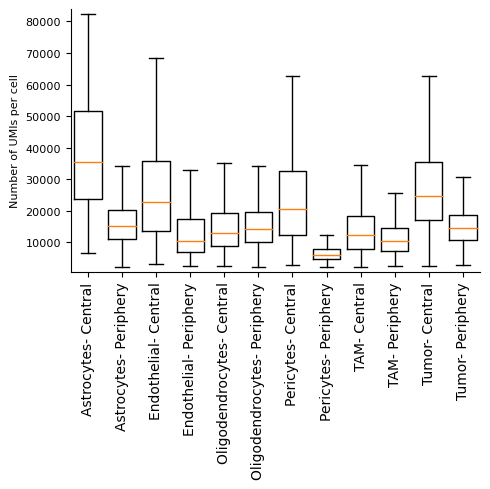

In [14]:
plt.figure(None, (5, 5))
ax = plt.subplot(111)

plt.boxplot(MergedUMI, showfliers=False, widths=0.8)

# x and y labels
plt.xticks(range(1, len(np.concatenate(unique_cells)) + 1), np.concatenate(unique_cells), rotation=90, fontsize=10)
plt.yticks(fontsize=8)
plt.ylabel('Number of UMIs per cell', fontsize=8)

# axes
plt.margins(0.02, 0.02)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()

In [25]:
mannwhitneyu(MergedUMI[0], MergedUMI[1], alternative='greater'), mannwhitneyu(MergedUMI[2], MergedUMI[3], alternative='greater'), mannwhitneyu(MergedUMI[4], MergedUMI[5], alternative='greater'), mannwhitneyu(MergedUMI[6], MergedUMI[7], alternative='greater'), mannwhitneyu(MergedUMI[8], MergedUMI[9], alternative='greater'), mannwhitneyu(MergedUMI[10], MergedUMI[11], alternative='greater')

(MannwhitneyuResult(statistic=406646.5, pvalue=1.0039498577494104e-19),
 MannwhitneyuResult(statistic=6375272.0, pvalue=6.871837488268252e-163),
 MannwhitneyuResult(statistic=85292856.0, pvalue=1.0),
 MannwhitneyuResult(statistic=1892604.0, pvalue=0.0),
 MannwhitneyuResult(statistic=75784722.0, pvalue=2.7661989053432133e-32),
 MannwhitneyuResult(statistic=71829912.5, pvalue=0.0))